#### Tokenization

In [1]:
from nltk.tokenize import word_tokenize

text = "I love programming and programming also loves me."
print(word_tokenize(text))

['I', 'love', 'programming', 'and', 'programming', 'also', 'loves', 'me', '.']


#### Lemmatization

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Raja
[nltk_data]     Harsha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize

text = "I love programming and programming also loves me."
tokens = word_tokenize(text)

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(word) for word in tokens]

['I', 'love', 'programming', 'and', 'programming', 'also', 'love', 'me', '.']

#### Steeming

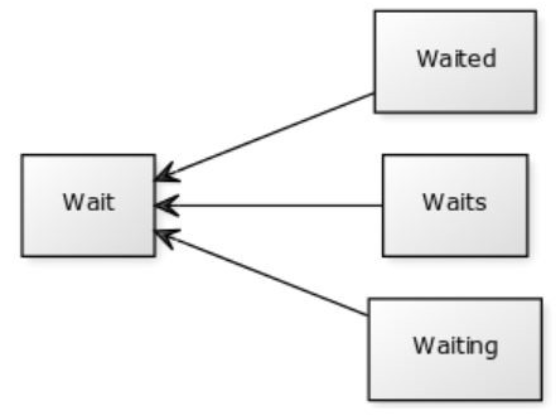

In [4]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

text = "I love programming and programming also loves me."
tokens = word_tokenize(text)

ps = PorterStemmer()
tokens = [ps.stem(word) for word in tokens]
print (tokens)

['I', 'love', 'program', 'and', 'program', 'also', 'love', 'me', '.']


#### Stop Words

Using NLTK's default list of "stopwords" filter the stopwords.

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Raja
[nltk_data]     Harsha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Removing Duplicates & Change Case to Lower

In [7]:
newtokens = []
for token in tokens:
    if token not in stopwords:
        newtokens.append(token)

print (newtokens)

['I', 'love', 'program', 'program', 'also', 'love', '.']


#### Normalizing Text

Real world data is not as good as the example above. So we can define our set of rules to remove unwanted characters using regular expressions. "re" library comes to our rescue.

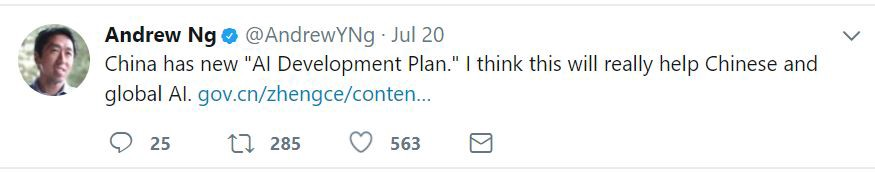

A sample Normalization function is defined below to handle a Tweet text.

In [8]:
tweet  =  'China has new "AI Development Plan." I think this will really help Chinese and global AI. http://www.gov.cn/zhengce/content/2017-07/20/content_5211996.html'  
print(tweet)

China has new "AI Development Plan." I think this will really help Chinese and global AI. http://www.gov.cn/zhengce/content/2017-07/20/content_5211996.html


In [9]:
import re

def normalize_text(text):
    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    text=re.sub( '\s+', ' ', text).strip()
    
    return text

normalized_tweet = normalize_text(tweet)
print (normalized_tweet)

china has new ai development plan i think this will really help chinese and global ai


#### Document Vectorization

In [10]:
documents= [' I love programming' , 'Programming also loves me']


from  nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs=[]

for document in documents:
    text=normalize_text(document)
    nl_text=''
    for word in word_tokenize(text):
        if word not in stopwords:
            nl_text+=(lemmatizer.lemmatize(word))+' '
    docs.append(nl_text)

docs

['love programming ', 'programming also love ']

In [11]:
import collections
words=" ".join(docs).split() 
count= collections.Counter(words).most_common()
print(count)

[('programming', 2), ('love', 2), ('also', 1)]


In [12]:
#create a lexicon [features]
features=[c[0] for c in count]
print(features)

['programming', 'love', 'also']


In [13]:
import numpy as np
training_examples=[]
for doc in docs:
    doc_feature_values = np.zeros(len(features))
    for word in word_tokenize(doc):
        if word in features:
            index=features.index(word)
            doc_feature_values[index] +=1
            
    training_examples.append(doc_feature_values)

In [14]:
training_examples

[array([ 1.,  1.,  0.]), array([ 1.,  1.,  1.])]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

bow = vectorizer.fit_transform(docs)
freqs = [(word, bow.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
results=sorted (freqs, key = lambda x: -x[1])
print(results)

[('programming', 2), ('love', 2), ('also', 1)]


In [16]:
import pandas as pd

feature_names = vectorizer.get_feature_names()
corpus_index = [n for n in docs]

df = pd.DataFrame(bow.todense(), index=corpus_index, columns=feature_names)
df

,also,love,programming
love programming,0,1,1
programming also love,1,1,1
